#  Blues Clues TIPS Analysis

### This is a notebook for analysis of the TIPS dataset provided by the Institute for Advanced Analytics

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
# Remove start and end_tokens when looking at distribution

[nltk_data] Downloading package punkt to /Users/yangrchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yangrchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = pd.read_csv('MSA2024_TIPS_Data.csv')
df.head()

,TIP #1,TIP #2,TIP #3,Anything else you want to mention? [this can be more TIPS if you are overflowing with advice],Year
0,Keep in mind before the class: where have we b...,Remember to clean the kitchen,NaN,NaN,2023
1,prioritize life outside of the IAA so you don'...,NaN,start the data visualization project way earli...,NaN,2023
2,"When they say ""trust the process,"" you actuall...",you are expected to maintain an A/B grade poin...,"Fall 2 is the most stressful, fast-paced semes...",Don't worry about the TIPS project so much. It...,2023
3,when you are interested in an analytic group ...,If you are coming into the program after havin...,"Depending on your cohort, you may or may not m...","Put your mental health and relationships, abov...",2023
4,Take good care of yourself. Getting adequate s...,"Don't be shy to ask the faculty, classmates, T...",Hang out with your classmates during lunch or ...,It's useful to have prior knowledge of Python ...,2023


# Text pre-processing

In [12]:
# Text pre-processing, remove stop words etc, lower case
# Plot Unigram, bigram, trigram frequencies for each year
# IMPORTANT: A 'token' is just a word. We call them tokens because not every item in a sentence is an english word... i.e.
# numbers, symbols, etc. When I split things into tokens, I am just breaking up the bigger string

# data structure looks like this
# years = {2016->2023}
# each year is list of lists containing the text tokens
# Replace the NaNs with empty string
df=df.replace(to_replace = np.nan, value = " ") 

In [13]:
# intializing our years dictionary with empty lists that will contain sublists of TIPS as tokens
years = {2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: [], 2023: []}

# for every row
for i in range(len(df)):
    # and every column excluding the years
    for j in range(len(df.columns) - 1):
        # get the tips as lower case tokens
        tips = nltk.word_tokenize(df.iloc[i,j].lower())
        # remove stopwords and punctuation before adding
        # NOTE: consider not removing stopwords, as it doesn't read very well, see output below
        stop_words = stopwords.words('english')
        clean_tips = [word for word in tips if word not in stop_words and word not in string.punctuation and word != "n't" and word != "'re" and word != "'s"]
        # add the tips to the dictionary, only if non-empty
        if(clean_tips != []):
            years[df.iloc[i,4]].append(clean_tips)

# print(years)

# Getting the unigrams
#### (uncomment the print at the end to see the map)

In [14]:
# Obtain Unigram counts
unigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}
from collections import defaultdict

# Obtain Unigram counts
unigram_counts = defaultdict(dict)
# go through every year
for year in years:
    
    # get unigrams
    unigrams = [word for tips in years[year] for word in tips]
    
    unigram_counts[year] = defaultdict(int)
    for unigram in unigrams:
        unigram_counts[year][unigram] += 1
        
# now we have a unigram probability distribution for every word, for every year, saved in this unigram map!
# print(unigram_map)

In [15]:
print(unigram_counts)

defaultdict(<class 'dict'>, {2016: defaultdict(<class 'int'>, {'international': 3, 'student': 3, 'provide': 5, 'ois': 1, 'address': 2, 'filling': 1, 'opt': 2, 'form': 1, 'never': 8, 'university': 2, 'residential': 1, 'time': 29, 'employment': 1, 'card': 1, 'arrives': 1, 'left': 1, 'residence': 1, 'apply': 4, 'jobs': 5, 'online': 1, 'winter': 2, 'break': 3, 'take': 21, 'care': 1, 'possible': 6, 'get': 31, 'sleep': 2, 'stay': 7, 'healthy': 1, 'throughout': 3, 'year': 4, 'manage': 4, 'well': 6, 'sas': 7, 'e-learning': 1, 'especially': 6, 'summer': 12, 'programming': 4, 'experience': 9, 'coming': 3, 'program': 18, 'looking': 4, 'make': 21, 'sure': 7, 'emphasize': 1, 'value': 2, 'would': 5, 'bring': 1, "'ve": 3, 'learned': 2, 'everyone': 10, 'education': 1, 'stand': 2, 'highlighting': 1, 'unique': 2, 'help': 15, 'listen': 1, 'april': 3, 'says': 1, 'networking': 3, 'important': 6, 'really': 10, 'want': 10, 'job': 18, 'show': 1, 'extra': 1, 'effort': 4, 'reach': 3, 'second': 2, 'round': 1, 'i

In [16]:

counts = {year: {"sas": 0, "python": 0, "r": 0} for year in unigram_map.keys()}


In [17]:

for year, year_data in unigram_map.items():
    for word, probability in year_data.items():
        if word in counts[year]:
            counts[year][word] += 1

print(counts)

{2016: {'sas': 0, 'python': 0, 'r': 0}, 2017: {'sas': 0, 'python': 0, 'r': 0}, 2018: {'sas': 0, 'python': 0, 'r': 0}, 2019: {'sas': 0, 'python': 0, 'r': 0}, 2020: {'sas': 0, 'python': 0, 'r': 0}, 2021: {'sas': 0, 'python': 0, 'r': 0}, 2022: {'sas': 0, 'python': 0, 'r': 0}, 2023: {'sas': 0, 'python': 0, 'r': 0}}


### Creating distribution graph

In [18]:
for year, word_freqs in unigram_map.items():
    sorted_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [word for word, freq in sorted_freqs[:10]]
    print(f"Year {year}: Top 10 words by frequency are {top_10_words}")

Year 2016: Top 10 words by frequency are []
Year 2017: Top 10 words by frequency are []
Year 2018: Top 10 words by frequency are []
Year 2019: Top 10 words by frequency are []
Year 2020: Top 10 words by frequency are []
Year 2021: Top 10 words by frequency are []
Year 2022: Top 10 words by frequency are []
Year 2023: Top 10 words by frequency are []


In [83]:
# insert start and end tokens to know where one tip ends and the next begins
for year in years:
    for tips in years[year]:
        tips.insert(0,"start_token")
        tips.append("end_token")

# Getting the bigrams
#### (uncomment the print at the end to see the map)

In [84]:
# Obtain Bigram counts

# creating the bigram map
bigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}

# go through every year
for year in years:
    
    # and flatten the arrays
    words = [word for tips in years[year] for word in tips]
    
    # get bigrams
    bigrams = list(nltk.bigrams(words))
    
    # get distribution of bigrams
    fdist = FreqDist(bigrams)

    # total number of bigrams
    total_bigrams = fdist.N()

    # convert counts to probablities
    for bigram, frequency in fdist.items():
        prob = frequency / total_bigrams
        # add probs to bigram map
        bigram_map[year][bigram] = prob

# now we have a bigram probability distribution for every word, for every year, saved in this bigram map
    
# print(bigram_map)

In [85]:
for year, word_freqs in bigram_map.items():
    sorted_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [word for word, freq in sorted_freqs[:15]]
    print(f"Year {year}: Top 10 words by frequency are {top_10_words}")

Year 2016: Top 10 words by frequency are [('end_token', 'start_token'), ('start_token', 'take'), ('start_token', 'learn'), ('program', 'end_token'), ('make', 'sure'), ('take', 'time'), ('fall', 'semester'), ('job', 'search'), ('start_token', 'make'), ('start_token', 'keep'), ('start_token', 'try'), ('start_token', 'trust'), ('r', 'python'), ('get', 'know'), ('start_token', 'apply')]
Year 2017: Top 10 words by frequency are [('end_token', 'start_token'), ('start_token', 'take'), ('make', 'sure'), ('start_token', 'try'), ('get', 'know'), ('take', 'time'), ('program', 'end_token'), ('job', 'search'), ('work', 'end_token'), ('try', 'get'), ('start_token', 'make'), ('take', 'advantage'), ('interview', 'season'), ('process', 'end_token'), ('start_token', 'start')]
Year 2018: Top 10 words by frequency are [('end_token', 'start_token'), ('trust', 'process'), ('practicum', 'team'), ('start_token', 'trust'), ('start_token', 'get'), ('start_token', 'take'), ('get', 'know'), ('open', 'source'), ('

# Getting the trigrams
#### (uncomment the print at the end to see the map)

In [86]:
# Obtain Trigram counts

# creating the trigram map
trigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}

# go through every year
for year in years:
    
    # and flatten the arrays
    words = [word for tips in years[year] for word in tips]
    
    # get trigrams
    trigrams = list(nltk.trigrams(words))
    
    # get distribution of trigrams
    fdist = FreqDist(trigrams)

    # total number of trigrams
    total_trigrams = fdist.N()

    # convert counts to probablities
    for trigram, frequency in fdist.items():
        prob = frequency / total_trigrams
        # add probs to trigram map
        trigram_map[year][trigram] = prob

# now we have a trigram probability distribution for every word, for every year, saved in this trigram map!
# print(trigram_map)


## Frequency Graphs

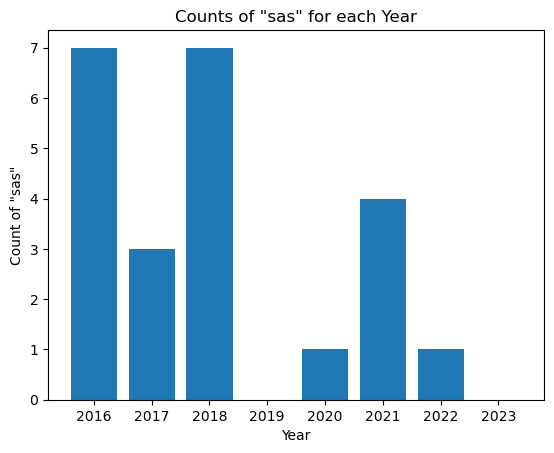

In [19]:
# Counts of "sas" for each year
sas_counts = []

# Extract the counts of "sas" for each year
for year in unigram_counts:
    sas_count = unigram_counts[year].get("sas", 0)
    sas_counts.append(sas_count)

# Create the bar graph
plt.bar(years.keys(), sas_counts)
plt.xlabel('Year')
plt.ylabel('Count of "sas"')
plt.title('Counts of "sas" for each Year')
plt.show()

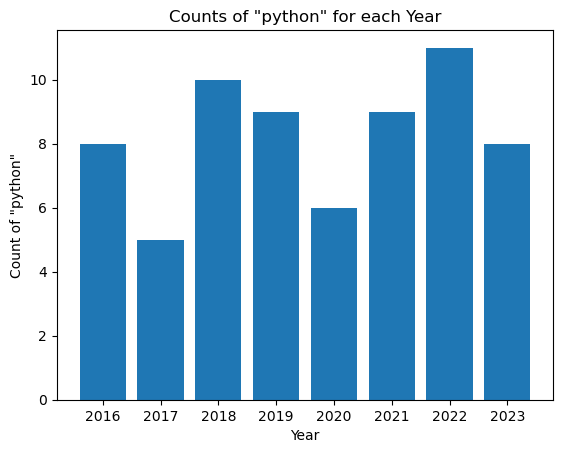

In [20]:
# Counts of "python" for each year
python_counts = []

# Extract the counts of "python" for each year
for year in unigram_counts:
    python_count = unigram_counts[year].get("python", 0)
    python_counts.append(python_count)

# Create the bar graph
plt.bar(years.keys(), python_counts)
plt.xlabel('Year')
plt.ylabel('Count of "python"')
plt.title('Counts of "python" for each Year')
plt.show()

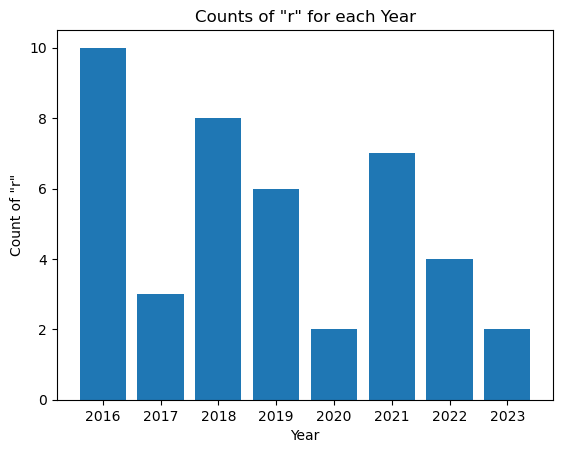

In [21]:
# Counts of "r" for each year
r_counts = []

# Extract the counts of "r" for each year
for year in unigram_counts:
    r_count = unigram_counts[year].get("r", 0)
    r_counts.append(r_count)


plt.bar(years.keys(), r_counts)
plt.xlabel('Year')
plt.ylabel('Count of "r"')
plt.title('Counts of "r" for each Year')
plt.show()

In [22]:
# Define the target words
target_words = ["python", "r", "sas", "sql"]

# Calculate the coding_total for each year
coding_total = {}

# Iterate over the years
for year, word_counts in unigram_counts.items():
    total_count = sum(word_counts.get(word, 0) for word in target_words)
    coding_total[year] = total_count

# Print the coding_total for each year
for year, total_count in coding_total.items():
    print(f"Year: {year}, Coding Total: {total_count}")


Year: 2016, Coding Total: 27
Year: 2017, Coding Total: 16
Year: 2018, Coding Total: 25
Year: 2019, Coding Total: 17
Year: 2020, Coding Total: 9
Year: 2021, Coding Total: 20
Year: 2022, Coding Total: 18
Year: 2023, Coding Total: 14


In [23]:
# Calculate the frequencies for each coding language divided by coding_total
coding_frequencies = {}

# Iterate over the years
for year, word_counts in unigram_counts.items():
    total_count = coding_total.get(year, 0)
    frequencies = {}
    
    # frequencies for each coding language
    for word in target_words:
        count = word_counts.get(word, 0)
        frequency = count / total_count if total_count != 0 else 0
        frequencies[word] = frequency
    
    coding_frequencies[year] = frequencies

# frequencies for each year
for year, frequencies in coding_frequencies.items():
    print(f"Year: {year}")
    for word, frequency in frequencies.items():
        print(f"{word}: {frequency}")


Year: 2016
python: 0.2962962962962963
r: 0.37037037037037035
sas: 0.25925925925925924
sql: 0.07407407407407407
Year: 2017
python: 0.3125
r: 0.1875
sas: 0.1875
sql: 0.3125
Year: 2018
python: 0.4
r: 0.32
sas: 0.28
sql: 0.0
Year: 2019
python: 0.5294117647058824
r: 0.35294117647058826
sas: 0.0
sql: 0.11764705882352941
Year: 2020
python: 0.6666666666666666
r: 0.2222222222222222
sas: 0.1111111111111111
sql: 0.0
Year: 2021
python: 0.45
r: 0.35
sas: 0.2
sql: 0.0
Year: 2022
python: 0.6111111111111112
r: 0.2222222222222222
sas: 0.05555555555555555
sql: 0.1111111111111111
Year: 2023
python: 0.5714285714285714
r: 0.14285714285714285
sas: 0.0
sql: 0.2857142857142857


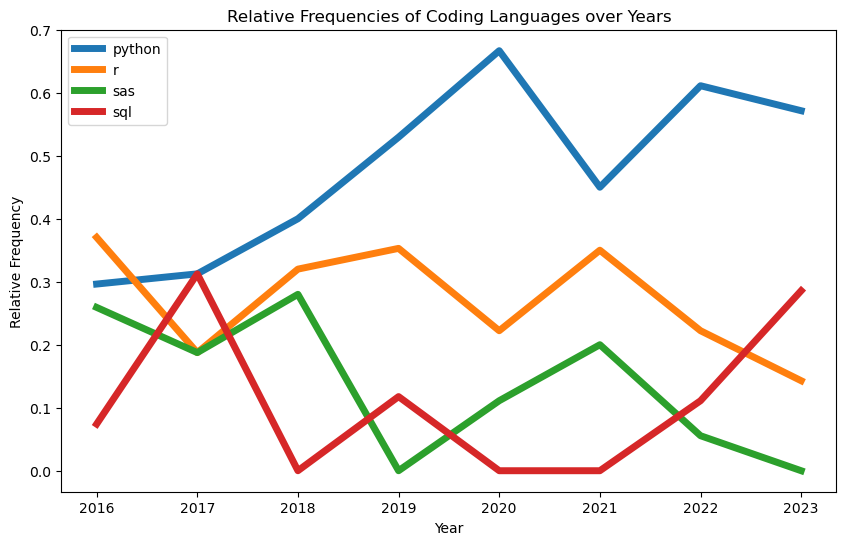

In [24]:
x_values = list(coding_frequencies.keys())  # Years
y_values = {word: [] for word in target_words}  # Frequencies for each coding language

# frequencies for each coding language for each year
for year, frequencies in coding_frequencies.items():
    for word, frequency in frequencies.items():
        y_values[word].append(frequency)

data = {'Year': x_values} # convert these values into a df
data.update(y_values)
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
#figures = [0,":","--","-."]

for word in target_words:
    sns.lineplot(x='Year', y=word, data=df, label=word,linewidth=5,
    markers=True, dashes=False)

plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Coding Languages over Years')

plt.legend()
plt.show()


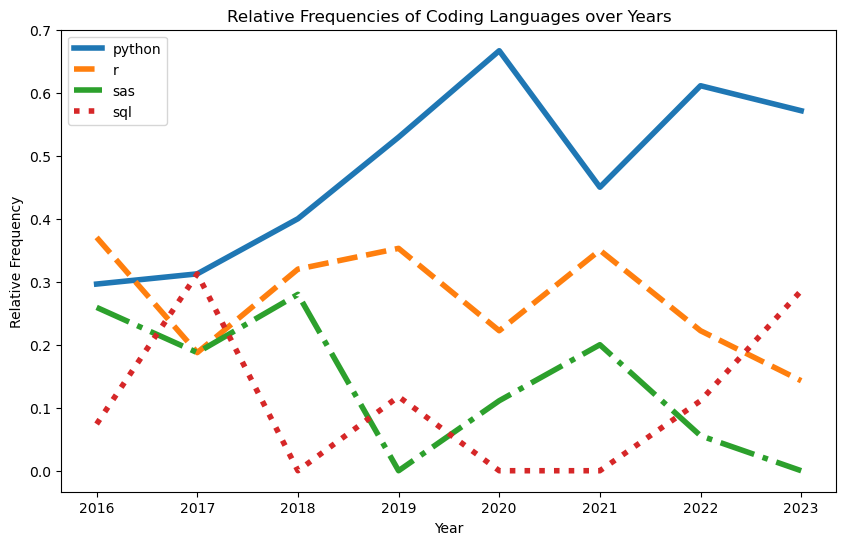

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x_values = list(coding_frequencies.keys())  # Years
y_values = {word: [] for word in target_words}  # Frequencies for each coding language

# frequencies for each coding language for each year
for year, frequencies in coding_frequencies.items():
    for word, frequency in frequencies.items():
        y_values[word].append(frequency)

data = {'Year': x_values}  # convert these values into a df
data.update(y_values)
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

line_patterns = ['-', '--', '-.', ':']  # Different line patterns

for i, word in enumerate(target_words):
    pattern_index = i % len(line_patterns)
    line_pattern = line_patterns[pattern_index]
    sns.lineplot(x='Year', y=word, data=df, label=word, linewidth=4, linestyle=line_pattern)

plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Coding Languages over Years')

plt.legend()
fig1 = plt.gcf()
plt.show()

In [36]:
from pathlib import Path
save_path = Path("../images")

if not save_path.exists():
    save_path.mkdir(exist_ok=True)

fig1.savefig(save_path / "overall.png")

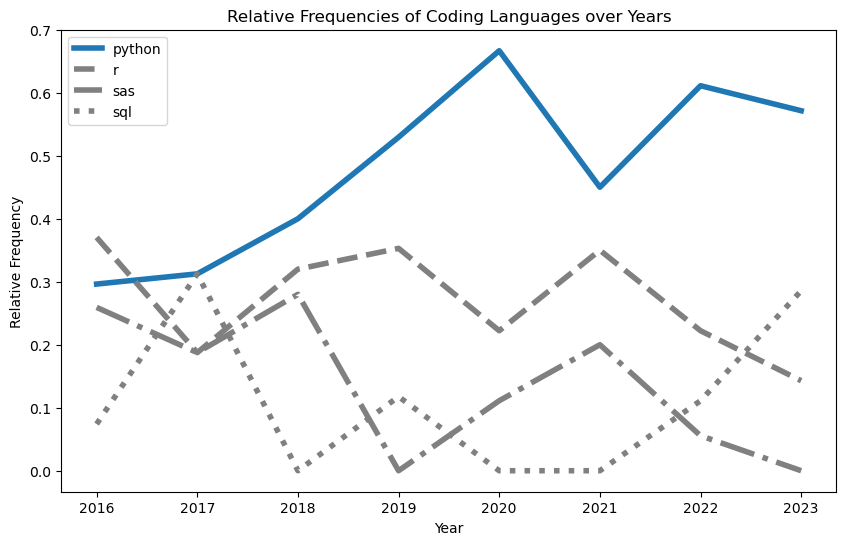

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x_values = list(coding_frequencies.keys())  # Years
y_values = {word: [] for word in target_words}  # Frequencies for each coding language

# frequencies for each coding language for each year
for year, frequencies in coding_frequencies.items():
    for word, frequency in frequencies.items():
        y_values[word].append(frequency)

data = {'Year': x_values}  # convert these values into a df
data.update(y_values)
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

line_patterns = ['-', '--', '-.', ':']  # Different line patterns
colors = ['gray'] * len(target_words)  # Default color for all lines is gray

# Set Python line color to blue
python_index = target_words.index('python')
colors[python_index] = 'tab:blue'

for i, word in enumerate(target_words):
    pattern_index = i % len(line_patterns)
    line_pattern = line_patterns[pattern_index]
    line_color = colors[i]
    sns.lineplot(x='Year', y=word, data=df, label=word, linewidth=4, linestyle=line_pattern, color=line_color)

plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Coding Languages over Years')

plt.legend()
fig2 = plt.gcf()
plt.show()


In [43]:
fig2.savefig(save_path / "python.png")

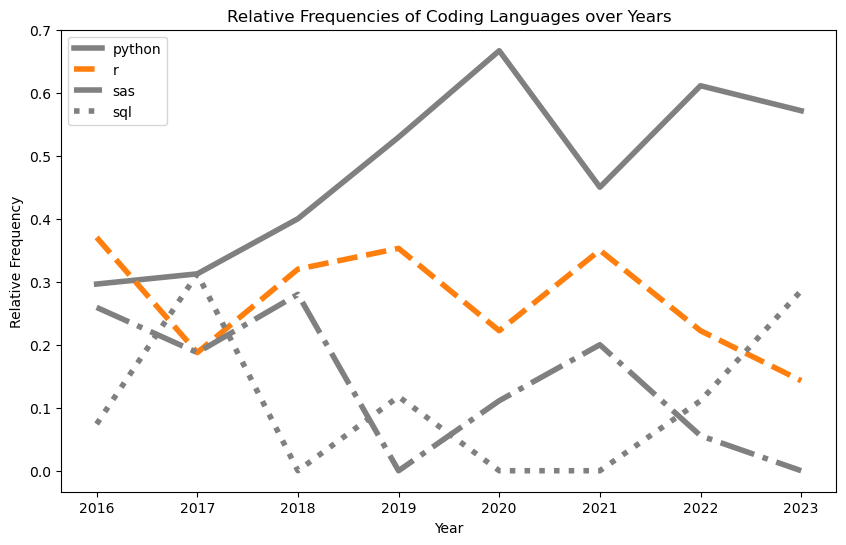

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x_values = list(coding_frequencies.keys())  # Years
y_values = {word: [] for word in target_words}  # Frequencies for each coding language

# frequencies for each coding language for each year
for year, frequencies in coding_frequencies.items():
    for word, frequency in frequencies.items():
        y_values[word].append(frequency)

data = {'Year': x_values}  # convert these values into a df
data.update(y_values)
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

line_patterns = ['-', '--', '-.', ':']  # Different line patterns
colors = ['gray'] * len(target_words)  # Default color for all lines is gray
sns.set_palette("pastel")
# Set Python line color to blue
python_index = target_words.index('r')
colors[python_index] = 'tab:orange'

for i, word in enumerate(target_words):
    pattern_index = i % len(line_patterns)
    line_pattern = line_patterns[pattern_index]
    line_color = colors[i]
    sns.lineplot(x='Year', y=word, data=df, label=word, linewidth=4, linestyle=line_pattern, color=line_color)

plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Coding Languages over Years')

plt.legend()
fig3 = plt.gcf()
plt.show()


In [45]:
fig3.savefig(save_path / "R.png")

In [ ]:
data = {'Year': x_values}
data.update(y_values)
df = pd.DataFrame(data)

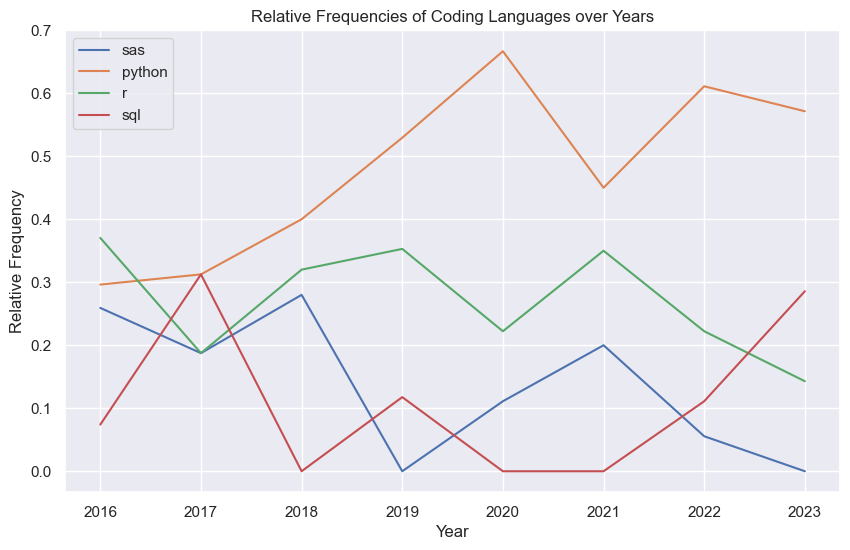

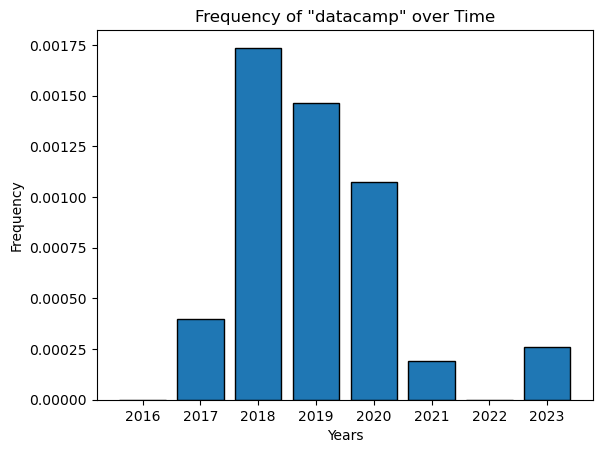

In [ ]:
# Extract the frequencies of "datacamp" for each year
dc_frequencies = [tip_data.get('datacamp', 0) for tip_data in unigram_map.values()]
x = list(years.keys())
# Create a bar graph
plt.bar(x, dc_frequencies, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of "datacamp" over Time')
plt.show()

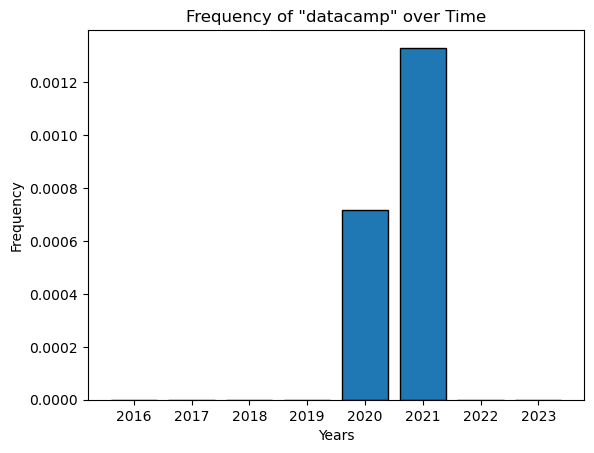

In [ ]:
# Extract the frequencies of "time" for each year
time_frequencies = [tip_data.get('zoom', 0) for tip_data in unigram_map.values()]
x = list(years.keys())
# Create a bar graph
plt.bar(x, time_frequencies, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of "datacamp" over Time')
plt.show()